In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


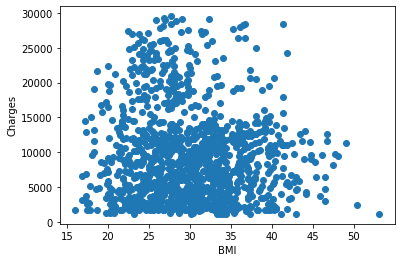

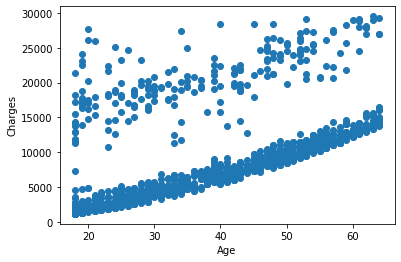

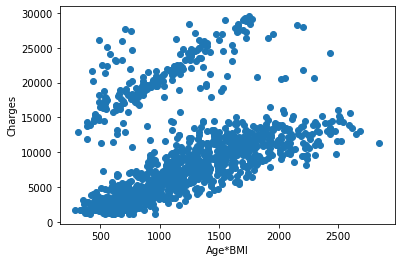

In [75]:
#--------------------Linear Regression Classifier-----------------------------

# loading data into pandas dataframe
df = pd.read_csv("Medical Price Dataset.csv")

# pre processing 

# dropping farther points to improve fit
train_data = pd.read_csv("Medical Price Dataset.csv")
train_data.drop(train_data[train_data['charges'] > 30000].index, inplace = True)
print(train_data.head())

# bmi vs charges
plt.scatter(train_data["bmi"].to_list(), train_data["charges"].to_list())
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# age vs charges
plt.scatter(train_data["age"].to_list(), train_data["charges"].to_list())
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

# using product of age and bmi as X_train feature as data is more dense and
# convenient to perform linear regression
product = []
for i,j in zip(train_data["age"].to_list(), train_data["bmi"].to_list()): 
  product.append(i*j)

# (age X bmi) vs charges
plt.scatter(product, train_data["charges"].to_list())
plt.xlabel("Age*BMI")
plt.ylabel("Charges")
plt.show()

In [76]:
# this function is used to give slope with least error
# assuming y = wx (b = 0)
def minimize_error_for_slope(X_train, y_train):
  errors = {}
  total_error = 0
  for i in range(len(X_train)):
    value = y_train[i]/X_train[i]   
    for j in range(len(X_train)):
      error = (y_train[j] - value*X_train[j])**2
      total_error = total_error + error
    errors[total_error] = value
    total_error = 0
  minimum_error = min(errors.keys())
  slope_value = errors[minimum_error]
  return slope_value

In [77]:
# this function is used to give b value with least error
def minimize_error_for_b(X_train, y_train, slope):
  errors = {}
  total_error = 0
  for i in range(len(X_train)):
    value = y_train[i] - slope*X_train[i]  
    for j in range(len(X_train)):
      error = (y_train[j] - value*X_train[j])**2
      total_error = total_error + error
    errors[total_error] = value
    total_error = 0
  minimum_error = min(errors.keys())
  b_value = errors[minimum_error]
  return b_value

In [78]:
# this function is used to fit a line for the given data
def fit(X_train, y_train):
  # initially assuming b = 0 and y = mx
  slope = minimize_error_for_slope(X_train, y_train)
  b = minimize_error_for_b(X_train, y_train, slope)
  return slope,b

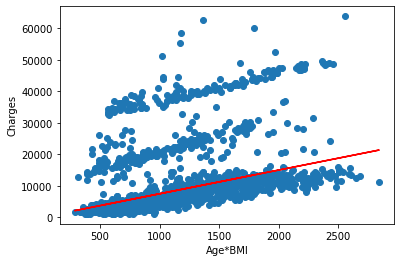


The mean square error of theis model is : 147548644.03947908


In [79]:
#-------------------------------Main----------------------------------------
if __name__ == "__main__":
  X_train = product
  y_train = train_data["charges"].to_list()
  
  # training the model
  w, b = fit(X_train, y_train)

  # plotting the linear regression
  x = []
  for i,j in zip(df["age"].to_list(), df["bmi"].to_list()): 
    x.append(i*j)
  y = df["charges"].to_list()
  plt.scatter(x, y)
  # predictions 
  y = [i*w+b for i in x]
  plt.plot(x, y, color='r')
  plt.xlabel("Age*BMI")
  plt.ylabel("Charges")
  plt.show()

  # Mean Squared Error 
  mse = np.square(np.subtract(df["charges"].to_list(), y)).mean()
  print("\nThe mean square error of theis model is :", mse)

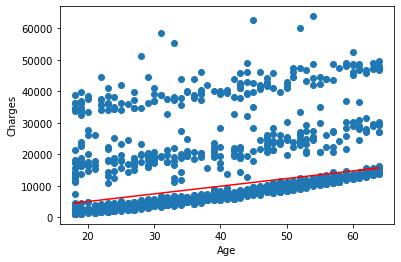


The mean square error of theis model is : 146174537.58538842


In [80]:
#-------------------------------Main----------------------------------------
if __name__ == "__main__":
  X_train = train_data["age"].to_list()
  y_train = train_data["charges"].to_list()
  
  # training the model
  w, b = fit(X_train, y_train)

  # plotting the linear regression
  x = df["age"].to_list()
  y = df["charges"].to_list()
  plt.scatter(x, y)
  # predictions 
  y = [i*w+b for i in x]
  plt.plot(x, y, color='r')
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.show()

  # Mean Squared Error 
  mse = np.square(np.subtract(df["charges"].to_list(), y)).mean()
  print("\nThe mean square error of theis model is :", mse)

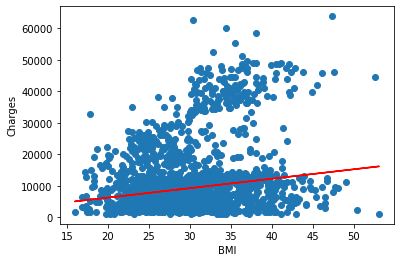


The mean square error of theis model is : 155520321.91397536


In [81]:
#-------------------------------Main----------------------------------------
if __name__ == "__main__":
  X_train = train_data["bmi"].to_list()
  y_train = train_data["charges"].to_list()
  
  # training the model
  w, b = fit(X_train, y_train)

  # plotting the linear regression
  x = df["bmi"].to_list()
  y = df["charges"].to_list()
  plt.scatter(x, y)
  # predictions 
  y = [i*w+b for i in x]
  plt.plot(x, y, color='r')
  plt.xlabel("BMI")
  plt.ylabel("Charges")
  plt.show()

  # Mean Squared Error 
  mse = np.square(np.subtract(df["charges"].to_list(), y)).mean()
  print("\nThe mean square error of theis model is :", mse)

In [82]:
print("The age vs charges gives the least value of mean square error hence it is best fit")
print("\n--------------------------------END------------------------------------------")

The age vs charges gives the least value of mean square error hence it is best fit

--------------------------------END------------------------------------------
